In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv(r'D:\data science\data science assg\ass.14 Decision Trees\Company_Data.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df = pd.get_dummies(df)

In [6]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [20]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


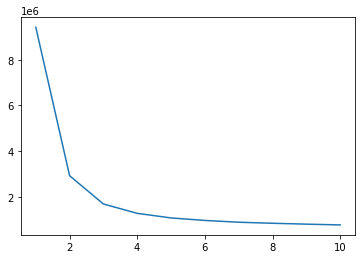

In [15]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, random_state=0)
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.show()

In [18]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(df)
model.labels_
df['cluster']=model.labels_

In [21]:
df.groupby('cluster')
cl2 = df.sort_values('cluster')
cl2

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,cluster
399,9.71,134,37,0,27,120,49,16,0,1,0,0,1,0,1,0
145,8.77,144,63,11,27,117,47,17,0,0,1,0,1,0,1,0
300,8.57,116,78,1,158,99,45,11,0,0,1,0,1,0,1,0
150,10.49,122,84,8,176,114,57,10,0,1,0,1,0,0,1,0
344,8.43,138,80,0,108,126,70,13,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,5.73,141,33,0,243,144,34,17,0,0,1,0,1,1,0,2
220,10.59,131,120,15,262,124,30,10,0,0,1,0,1,0,1,2
223,3.45,110,45,9,276,125,62,14,0,0,1,0,1,0,1,2
233,8.65,123,76,18,218,120,29,14,0,0,1,1,0,0,1,2


# preparing decision tree

In [26]:
com =cl2.drop('Sales',axis=1)

In [27]:
com

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,cluster
399,134,37,0,27,120,49,16,0,1,0,0,1,0,1,0
145,144,63,11,27,117,47,17,0,0,1,0,1,0,1,0
300,116,78,1,158,99,45,11,0,0,1,0,1,0,1,0
150,122,84,8,176,114,57,10,0,1,0,1,0,0,1,0
344,138,80,0,108,126,70,13,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,141,33,0,243,144,34,17,0,0,1,0,1,1,0,2
220,131,120,15,262,124,30,10,0,0,1,0,1,0,1,2
223,110,45,9,276,125,62,14,0,0,1,0,1,0,1,2
233,123,76,18,218,120,29,14,0,0,1,1,0,0,1,2


In [31]:
X = com.drop('cluster',axis = 1)
y = com['cluster']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [33]:
model=DecisionTreeClassifier( criterion='gini')
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
model.score(X_test,y_test)

1.0

In [37]:
preds = model.predict(X_test)
preds

array([0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 2, 2,
       2, 2, 2, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0,
       2, 0, 1, 1, 2, 0, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 1, 1,
       1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 2, 0, 2,
       2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1,
       0, 2, 0, 1, 0, 1, 1, 2, 1, 1])